In [68]:
#### Loading the packages to be used
from __future__ import print_function 
import pandas as pd
import numpy as np
from scipy import stats

from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from  statsmodels.genmod import generalized_linear_model

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns

In [34]:
#read in csv file and create data frame
train_sub = pd.read_csv("train_sub.csv")
train_sub = pd.DataFrame(train_sub)
pd.set_option('display.max_columns', None)
train_sub.head()

#drop columns: "X1stFlrSF, X2ndFlrSF, GarageQual, GarageCond, PavedDrive
train_sub = train_sub.drop(["X1stFlrSF", "X2ndFlrSF", "GarageQual", "GarageCond", "PavedDrive"], 1)
train_sub.head()


,MSZoning,Neighborhood,HouseStyle,OverallQual,YearBuilt,ExterQual,Foundation,BsmtQual,GrLivArea,FullBath,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,SaleType,SaleCondition,SalePrice
0,RL,CollgCr,2Story,7,2003,Gd,PConc,Gd,1710,2,8,RFn,2,548,WD,Normal,208500.0
1,RL,Veenker,1Story,6,1976,TA,CBlock,Gd,1262,2,6,RFn,2,460,WD,Normal,181500.0
2,RL,CollgCr,2Story,7,2001,Gd,PConc,Gd,1786,2,6,RFn,2,608,WD,Normal,223500.0
3,RL,Crawfor,2Story,7,1915,TA,BrkTil,TA,1717,1,7,Unf,3,642,WD,Abnorml,140000.0
4,RL,NoRidge,2Story,8,2000,Gd,PConc,Gd,2198,2,9,RFn,3,836,WD,Normal,250000.0


In [35]:
#split into numeric and categorical features and observed values
X_num = train_sub[["GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea"]]
X_cat = train_sub.drop(["GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "SalePrice"],1)
y = train_sub[["SalePrice"]]


In [36]:
#inspect summary of numeric variables
X_num.describe()

,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1.565068,6.517808,1.767123,472.980137
std,525.480383,0.550916,1.625393,0.747315,213.804841
min,334.000000,0.000000,2.000000,0.000000,0.000000
25%,1129.500000,1.000000,5.000000,1.000000,334.500000
50%,1464.000000,2.000000,6.000000,2.000000,480.000000
75%,1776.750000,2.000000,7.000000,2.000000,576.000000
max,5642.000000,3.000000,14.000000,4.000000,1418.000000


/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


0.46899747732296548

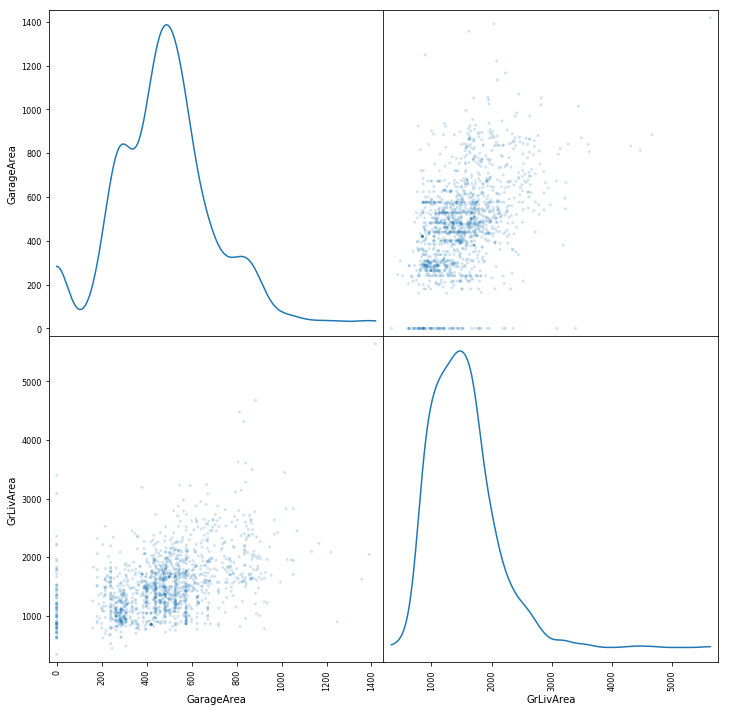

In [54]:
#Check for multicollinearity between GarageArea and GrLivArea. Scatter shows vague linear relationship. 
#Correlation is 0.46899

from pandas.tools.plotting import scatter_matrix
scatter_matrix(X_num[["GarageArea","GrLivArea"]], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.savefig('num_scatter.png')
np.corrcoef(X_num["GarageArea"], X_num["GrLivArea"])[0, 1]

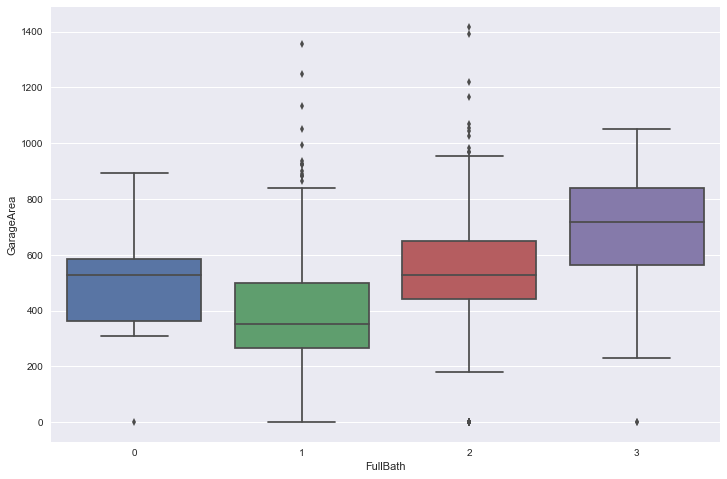

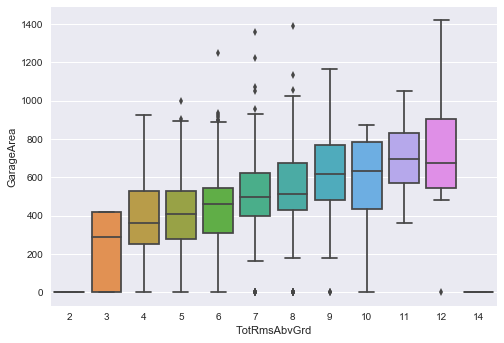

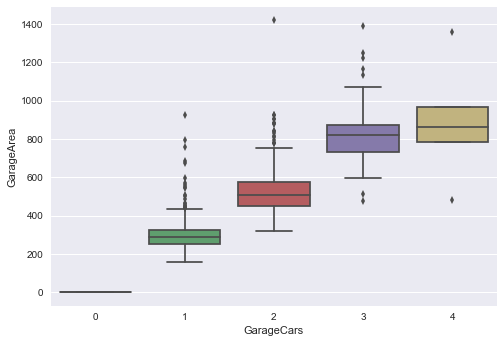

In [80]:
#check for multicollinearity between GarageArea with other variables (except GrLivarea) using boxplots.
#There does seem to be a linear relationship between Garage Area and these other variables.
#All seem pretty strong.
fig = plt.figure(figsize=(12, 8))
for i in range(1,4):
    sns.boxplot(y=X_num["GarageArea"], x=X_num.iloc[:,i])
    plt.show()

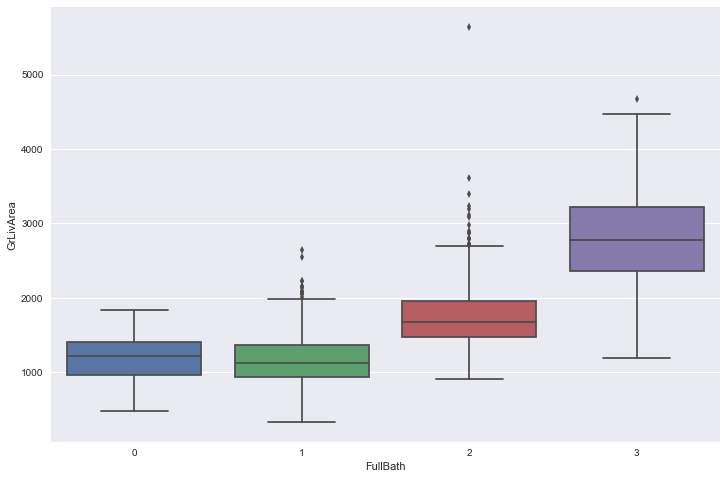

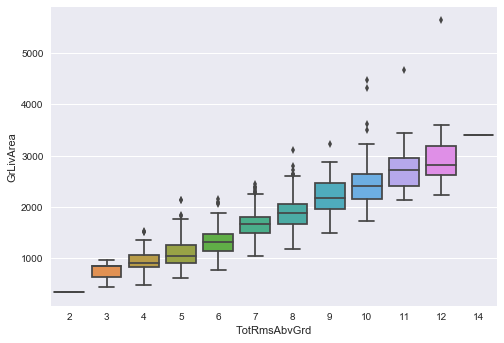

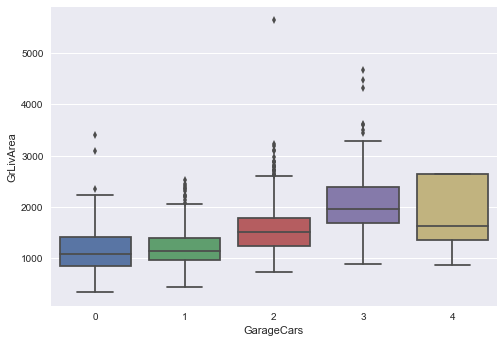

In [79]:
#check for multicollinearity between GrLivArea with other variables (except GrLivarea) using boxplots.
#There does seem to be a linear relationship between GrLiv Area and these other variables.
#TotRms and Full Bath are strongest.

fig = plt.figure(figsize=(12, 8))
for i in range(1,4):
    sns.boxplot(y=X_num["GrLivArea"], x=X_num.iloc[:,i])
    plt.show()

In [131]:
#Run linear model with just GrLivArea, GarageCars, GrLivArea

ols = linear_model.LinearRegression()
X = X_num[["GrLivArea", "GarageCars","GarageArea"]]
ols.fit(X, y)
print("R^2 for train set: %f" %ols.score(X, y))

colnames = X.columns
result = pd.DataFrame(ols.coef_)
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result


R^2 for train set: 0.628309


,coefficient
GrLivArea,77.735018
GarageCars,30177.576621
GarageArea,48.958270
intercept,-13367.190172


In [132]:
#Performing same analysis as above using Statsmodel
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     820.4
Date:                Sun, 05 Nov 2017   Prob (F-statistic):          2.99e-312
Time:                        01:40:13   Log-Likelihood:                -17822.
No. Observations:                1460   AIC:                         3.565e+04
Df Residuals:                    1456   BIC:                         3.567e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.337e+04   4140.327     -3.229      0.0